# Introduction to Pandas 3

Advanced Pandas syntax and joining.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Name Whose Popularity has Changed the Most

Let's plot the change in popularity of a name to see if we find any trends.

Run the cell below.

In [2]:
babynames_nc = pd.read_csv("babynames_nc.csv", index_col = 0)

**Example 1.1.** First we need to define change in popularity. For the purposes of this demonstration, let’s stay simple and use the absolute maximum and minimum difference (ammd).

To make sure we understand this quantity, let's consider the name Jordan.

Write a function named `ammd`that will compute the difference between the times the name Jordan was given the most and the least.

In [3]:
def ammd(series):
    return max(series) - min(series)

name = "Jordan"
counts = babynames_nc[babynames_nc.Name == name]["Count"]

ammd(counts)

489

### 1.1. For Loop

**Example 1.1.1.** Ideallly we would like to do this for all the names in the table. In Foundations fo Data Science we learned to use the `for` loop. We could use a dictionary to store the name (i.e. key) and count (i.e. value) as pairs.

In [4]:
# Build dictionary where entry i is the ammd function for the given name
# For example, ammd["Jordan"] should be 489

ammd_of_babyname_counts = {}

name = "Jordan"

# Select the first 10 unique names
for name in babynames_nc["Name"].unique()[0:10]:
    counts_of_current_name = babynames_nc[babynames_nc["Name"] == name]["Count"]
    ammd_of_babyname_counts[name] = ammd(counts_of_current_name)

# Convert to a series
ammd_of_babyname_counts = pd.Series(ammd_of_babyname_counts) 
ammd_of_babyname_counts

Mary         3119
Annie         981
Ruth          888
Ethel         393
Elizabeth     604
Margaret     1103
Lillie        341
Bessie        286
Ruby          680
Sarah         728
dtype: int64

### 1.2. Use `groupby` and `agg`

**Example 1.2.1.** We can use the `groupby.agg` operation, which allows us to simply and efficiently compute what we want.

In [5]:
babynames_nc.groupby("Name").agg(max).head()

,State,Sex,Year,Count
Name,,,,
Aaden,NC,M,2019,28
Aadhya,NC,F,2019,15
Aadya,NC,F,2019,9
Aahana,NC,F,2019,6
Aaiden,NC,M,2014,5


**Example 1.2.2.** Using the `ammd` functions for `agg()`.

In [6]:
babynames_nc.groupby("Name").agg(ammd).head()

,Year,Count
Name,,
Aaden,11,22
Aadhya,6,9
Aadya,7,4
Aahana,0,0
Aaiden,0,0


**Note:** The result includes both a Year and Count column. The Count column is what we want, namely the ammd for the name in that row. To check your understanding, try to figure out what the Year column represents.

To understand how `groupby` works, consider the visual diagram below. The `groupby` function clusters rows from the original dataframe into groups (which I call subframes). The `agg` function then condenses each subframe into a single representative row using the provided function $f$.

<center><img src="groupbyagg.png"></center>

**Example 1.2.3.** Let's actually build this DataFrame and play with it interactively to understand `groupby` better.

In [7]:
df = pd.DataFrame(dict(x=[3,1,4,1,5,9,2,5,6], y=[12,7,3,2,7,3,8,6,7]), index=list('ABCABCACB') )
df

,x,y
A,3,12
B,1,7
C,4,3
A,1,2
B,5,7
C,9,3
A,2,8
C,5,6
B,6,7


In [8]:
df_gb = df.groupby(df.index)
df_gb

In [9]:
df_gb.groups

{'A': ['A', 'A', 'A'], 'B': ['B', 'B', 'B'], 'C': ['C', 'C', 'C']}

In [ ]:
df_gb.groups['A']

In [ ]:
df_gb.get_group('A')

In [10]:
df_gb.agg(ammd)

,x,y
A,2,10
B,5,0
C,5,3


## 2. Some Additional Groupby Examples

**Example 2.1.** Test your understanding, by trying to interpret the result of the code below.

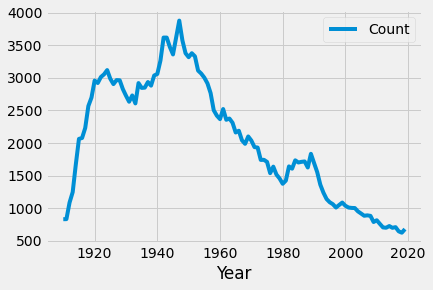

In [18]:
babynames_nc.groupby("Year").agg(ammd).plot();

**Example 2.2.** Let's look at the intermediate dataframes for each year.

In [15]:
for i, (k, v) in enumerate(babynames_nc.groupby("Year")):
    if i >= 3: break
    print(f"Year: {k}")
    display(v.head())

Year: 1910


,State,Sex,Year,Name,Count
0,NC,F,1910,Mary,837
1,NC,F,1910,Annie,401
2,NC,F,1910,Ruth,235
3,NC,F,1910,Ethel,199
4,NC,F,1910,Elizabeth,191


Year: 1911


,State,Sex,Year,Name,Count
345,NC,F,1911,Mary,838
346,NC,F,1911,Annie,373
347,NC,F,1911,Ruth,227
348,NC,F,1911,Elizabeth,208
349,NC,F,1911,Ruby,188


Year: 1912


,State,Sex,Year,Name,Count
684,NC,F,1912,Mary,1086
685,NC,F,1912,Annie,455
686,NC,F,1912,Ruth,313
687,NC,F,1912,Margaret,297
688,NC,F,1912,Elizabeth,278


**Example 2.3.** For reference, the first 5 values from the plot above are:

In [21]:
babynames_nc.groupby("Year").agg(ammd).head()

,Count
Year,
1910,832
1911,833
1912,1087
1913,1247
1914,1673


In [33]:
elections = pd.read_csv("elections.csv")
elections.head()

0      1824
1      1824
2      1828
3      1828
4      1832
       ... 
173    2016
174    2016
175    2016
176    2016
177    2016
Name: Year, Length: 178, dtype: int64

**Example 2.2.** We have to be careful when using aggregation functions. For example, the code below might be misinterpreted to say that Woodrow Wilson ran for election in 2016. Why is this happening?

In [34]:
elections.groupby("Party").agg(max).head(10)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1976,Thomas J. Anderson,873053,loss,21.554001
American Independent,1976,Lester Maddox,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2016,Michael Peroutka,203091,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,2016,Woodrow Wilson,69498516,win,61.344703


**Example 3.1.** Inspired by above, try to predict the results of the groupby operation shown.

<center><img src="groupbyagg1.png"></center>

**Example 3.2.** What goes in the first box with **??**, the second box with **??**, and the third box with **??**?

In [35]:
df = pd.DataFrame(dict(x=[3,1,4,1,5,9,2,5,6], 
                      y=['ak', 'tx', 'fl', 'hi', 'mi', 'ak', 'ca', 'sd', 'nc']), 
                      index=list('ABCABCACB') )
df

,x,y
A,3,ak
B,1,tx
C,4,fl
A,1,hi
B,5,mi
C,9,ak
A,2,ca
C,5,sd
B,6,nc


**Example 3.3.** Check your solutions by running the cell below.

In [ ]:
df.groupby(ds.index).agg(max)

**Example 4.1.** Next we'll write code that properly returns the best result by each party. That is, each row should show the Year, Candidate, Popular Vote, Result, and % for the election in which that party saw its best results (rather than mixing them as in the example above), here's what the first rows of the correct output should look like:

<center><img src="groupbyagg2.png"></center>

**Example 4.2.** You'll soon discover that with Pandas' rich tool set, there's typically more than one way to get to the same answer. Each approach has different tradeoffs in terms of readability, performance, memory consumption, complexity and more. It will take some experience for you to develop a sense of which approach is better for each problem, but you should in general try to think if you can at least envision a different solution to a given problem, especially if you find your current solution to be particularly convoluted or hard to read.

Here's a couple ways of obtaining the same result (in each case we only show the top part with head()). The first approach uses groupby but finds the location of the maximum value via the `idxmax()` method (look up its documentation!). We then index and sort by party to match the requested formatting:

In [48]:
elections_sorted_by_percent = elections.sort_values('%', ascending = False)
elections_sorted_by_percent.groupby("Party").agg(lambda x : x.iloc[0]).head()

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182


In [41]:
elections_sorted_by_percent = elections.sort_values("%", ascending = False)
elections_sorted_by_percent.groupby("Party").first().head()

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182


In [45]:
best_per_party = elections.loc[elections.groupby('Party')['%'].idxmax()]  
best_per_party.set_index('Party').sort_index().head()                  

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182


In [ ]:
best_per_party2 = elections.sort_values('%').drop_duplicates(['Party'], keep = 'last')
best_per_party2.set_index('Party').sort_index().head()                            

## 3. Join Review

In this section we'll briefly review joining tables as discussed in Data 8 (click [here](https://www.inferentialthinking.com/chapters/08/4/Joining_Tables_by_Columns.html) to review joining).

Often data is spread across two tables. Joining provides us with a way to naturally combine related tables.

Let's start by reading data from the given zip file. To showcase how to do read data that is inside zip files, we're going to use the `zipfile` module. Doing so will allow us to avoid needing to unzip the data. 


**Example 3.1.** Running the cell below, we see that the zip file contains `elections.csv` and `presidents.csv`.

In [49]:
import zipfile

join_demo_filename = "join_demo_data.zip"
my_zip = zipfile.ZipFile(join_demo_filename, 'r')
list_names = [f.filename for f in my_zip.filelist]
list_names

['elections.csv', 'presidents.csv']

**Example 3.2.** We could call `my_zip.extractall()` to unzip the files, but we won't. Instead, we'll read directly from the zip file itself.

In [50]:
with my_zip.open("elections.csv") as f:
    elections = pd.read_csv(f)
    
elections.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


In [51]:
with my_zip.open("presidents.csv") as f:
    presidents = pd.read_csv(f)
    
presidents.head()

,Date of birth,President,Birthplace,State of birth,In office
0,"February 22, 1732",George Washington,Westmoreland County,Virginia,"(1st) April 30, 1789 – March 4, 1797"
1,"October 30, 1735",John Adams,Braintree,Massachusetts,"(2nd) March 4, 1797 – March 4, 1801"
2,"April 13, 1743",Thomas Jefferson,Shadwell,Virginia,"(3rd) March 4, 1801 – March 4, 1809"
3,"March 16, 1751",James Madison,Port Conway,Virginia,"(4th) March 4, 1809 – March 4, 1817"
4,"April 28, 1758",James Monroe,Monroe Hall,Virginia,"(5th) March 4, 1817 – March 4, 1825"


**Example 3.3.** To join tables `df` and `df2`, we call the function `df.merge(df2)`. Merge is just the word that the authors of pandas picked for joining tables. I don't know why.

**Note:** Unfortunately, Pandas also has a function called `df.join`. This is a limited version of merge. For the sake of generality, we will only use merge in this class.

We can use the merge function to combine these two tables: 

In [ ]:
elections.merge(presidents, 
            how = "inner",
            left_on = "Candidate", right_on = "President")

Notice that:

1. The output dataframe only contains rows that have names in both tables. For example, presidents before 1824 do not appear in the joined table because there was no popular vote before 1824.

2. The name Andrew Jackson occurred three times in the election table and shows up three times in the output.

3. Grover Cleveland occurs six times! Twice for every election he was in. This is because he appears three times in the elections table and twice in the presidents table. This results in 3 x 2 = 6 combinations.

4. Several presidents are missing because their names are not an exact match. For example, John F. Kennedy is "John Kennedy" in the elections table and "John F. Kennedy" in the presidents table.

**Example 3.4.** With the caveats above in mind, this merged DataFrame is handy because we can use it to plot, e.g. the age of each president when they were elected.

In [ ]:
joined = elections.merge(presidents, 
            how = "inner",
            left_on = "Candidate", right_on = "President")

winners = joined.query("Result == 'win'").copy()
winners["Birthyear"] = winners["Date of birth"].str.split(',').str[1].map(int)
winners["Age"] = winners["Year"] - winners["Birthyear"]
sns.lmplot(data=winners, x="Year", y="Age");

#### 3.1. How could we fix the duplicate Grover Cleveland?

**Example 3.1.1.** We could group by name/candidate and take only the first:

In [ ]:
(
    elections.merge(presidents, 
            how = "inner",
            left_on = "Candidate", 
            right_on = "President").
    groupby(['Candidate', 'Year']).first().reset_index()
)

#### 3.2. Right Join

The above join was an inner join. 


**Example 3.2.1.** What if we wanted to keep all of the presidents and leave missing data for years when there was no popular vote? In this case we'd do a "right" join, where we make sure to include **every** row from our right dataframe, in this case presidents.

In [ ]:
elections.merge(presidents, 
            how = "right",
            left_on = "Candidate", right_on = "President")

#### 3.3. Left Join

**Example 3.3.1.** Similarly, if we also want to include candidates not in the presidents table (e.g. because they had never won), we can use a "left" join.

In [ ]:
elections.merge(presidents, 
            how = "left",
            left_on = "Candidate", right_on = "President")

#### 3.4. Outer Join

**Example 3.4.1.** If we wanted to keep both, we can instead do an "outer join".

In [ ]:
elections.merge(presidents, 
            how = "outer",
            left_on = "Candidate", right_on = "President")